## Анализ полученного набора данных

Набор данных получен с помощью модели openai/whisper-large-v3.

Оценим количество галлюцинаций модели.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp "/content/drive/MyDrive/Colab Notebooks/hac_rtk_2024/custom_whisper_data/part_1.csv" /content/open_data_1.csv
!cp "/content/drive/MyDrive/Colab Notebooks/hac_rtk_2024/custom_whisper_data/part_2.csv" /content/open_data_2.csv
!cp "/content/drive/MyDrive/Colab Notebooks/hac_rtk_2024/custom_whisper_data/part_3.csv" /content/open_data_3.csv

In [3]:
import pandas as pd

part_1 = pd.read_csv('/content/open_data_1.csv', encoding='utf-8')
part_2 = pd.read_csv('/content/open_data_2.csv', encoding='utf-8')
part_3 = pd.read_csv('/content/open_data_3.csv', encoding='utf-8')
open_data = pd.concat([part_1, part_2, part_3], ignore_index=True)

In [4]:
open_data

,names,texts
0,12352375_2024-03-14_16.04.49.mp3,Здравствуйте. Это компания проект молодежно-к...
1,12352375_2024-03-14_16.11.08.mp3,"Добрый день. Скажи, пожалуйста, это проект? Д..."
2,12352472_2024-03-20_11.25.20.mp3,"Алло. Добрый день. Подскажите, пожалуйста, ор..."
3,12352472_2024-03-20_15.19.45.mp3,"Алло. Здравствуйте еще раз, это Мария Раселик..."
4,12352472_2024-03-20_15.21.22.mp3,"Алло. Добрый день. Добрый. День числа, Павлов..."
...,...,...
3095,12742797_2024-04-23_15.28.55.mp3,Алло. Добрый день. Здравствуйте. Компания «Ро...
3096,12742797_2024-05-02_10.56.34.mp3,Алло. Добрый день. Здравствуйте. Компания Рос...
3097,12742797_2024-05-07_14.06.33.mp3,Алло. Добрый день. Спасибо. Компания Ростелек...
3098,12742797_2024-05-13_09.55.51.mp3,Здравствуйте! Вызываемый абонент сейчас не мо...


In [5]:
from collections import Counter

def count_most_commom(text):
  cnt = Counter(str(text).lower().split())
  return cnt.most_common(1)[0][1]

def most_commom_word(text):
  cnt = Counter(str(text).lower().split())
  return cnt.most_common(1)[0][0]

open_data['most_commom_word'] = open_data['texts'].apply(most_commom_word)
open_data['count_most_common'] = open_data['texts'].apply(count_most_commom)

In [6]:
open_data.describe()

,count_most_common
count,3100.000000
mean,6.931935
std,7.548502
min,1.000000
25%,2.000000
50%,5.000000
75%,9.000000
max,129.000000


In [7]:
open_data[open_data['count_most_common'] > 20]

,names,texts,most_commom_word,count_most_common
9,12352524_2024-03-27_16.06.45.mp3,"Здравствуйте, Скажите, пожалуйста, а у Вас ко...",у,26
14,12352751_2024-03-27_12.28.55.mp3,Да. Да. Да. Да. Да. Да. Да. Да. Да. Да. Да. Д...,да.,59
46,12353870_2024-03-22_09.43.25.mp3,Добрый день. Я хотела прочитаться по поводу м...,в,22
76,12354063_2024-03-28_15.43.48.mp3,"Алло. Алло, Катя Николаевна, добрый день. Доб...",у,39
91,12354166_2024-03-25_13.30.54.mp3,"Алло, продолжаю дать вам, не отключайтесь. Ск...",не,27
...,...,...,...,...
2905,12726241_2024-04-26_09.47.10.mp3,"Алло. Алло, добрый день. Александр Викторович...",я,31
2955,12728557_2024-04-03_05.15.17.mp3,"Слушаю. Алло, здравствуйте. Здравствуйте. Это...",у,22
2976,12728975_2024-04-03_11.51.18.mp3,"Здравствуйте. Виктор? Меня зовут Мария, компа...",у,25
3015,12730343_2024-04-25_08.55.01.mp3,Добрый день. Добрый день. Компания Ростелеком...,"1800,",45


## Анализ и предобработка данных

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
stop_words = set(stopwords.words('russian'))

counter_words = Counter()
for text in open_data['texts'].values:
  for word in word_tokenize(str(text).lower()):
    if word not in stop_words:
      counter_words[word] += 1

In [10]:
most_common_words = counter_words.most_common(150)
most_common_words

[(',', 95577),
 ('.', 70051),
 ('?', 20801),
 ('это', 6953),
 ('здравствуйте', 2638),
 ('спасибо', 2630),
 ('интернет', 2512),
 ('алло', 2285),
 ('могу', 2271),
 ('пожалуйста', 2188),
 ('свидания', 1981),
 ('просто', 1961),
 ('зовут', 1898),
 ('день', 1857),
 ('...', 1806),
 ('добрый', 1794),
 ('компания', 1729),
 ('номер', 1718),
 ('ростелеком', 1705),
 ('скажите', 1386),
 ('поняла', 1308),
 ('можете', 1291),
 ('звоню', 1261),
 ('рублей', 1257),
 ('вами', 1238),
 ('нам', 1214),
 ('давайте', 1188),
 ('вообще', 1149),
 ('очень', 1137),
 ('пока', 1073),
 ('подскажите', 1059),
 ('сколько', 1051),
 ('видеонаблюдение', 1010),
 ('знаю', 967),
 ('предложение', 955),
 ('что-то', 938),
 ('компании', 932),
 ('смотрите', 903),
 ('ага', 900),
 ('доброго', 891),
 ('бизнес', 891),
 ('связи', 856),
 ('нужно', 852),
 ('интернета', 849),
 ('услуги', 847),
 ('поводу', 804),
 ('телефон', 803),
 ('правильно', 770),
 ('«', 762),
 ('поэтому', 758),
 ('»', 756),
 ('предложить', 756),
 ('понимаю', 735),
 ('по

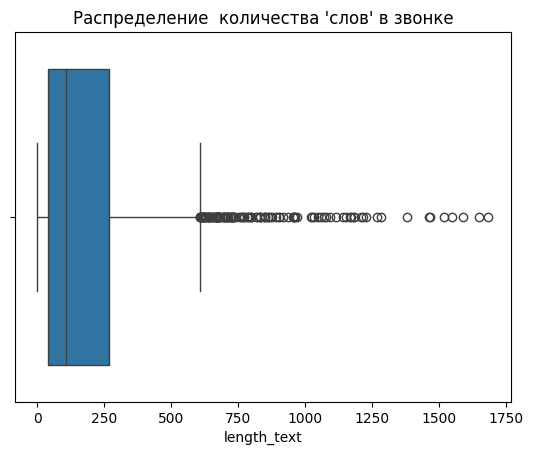

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

open_data['length_text'] = open_data['texts'].apply(lambda x: len(x.split()))
sns.boxplot(x='length_text', data=open_data).set_title("Распределение  количества 'слов' в звонке")
plt.show()

In [12]:
open_data[['length_text']].describe()

,length_text
count,3100.000000
mean,181.618387
std,203.332394
min,1.000000
25%,40.000000
50%,106.500000
75%,267.000000
max,1684.000000


Выводы: "средний" звонок содержит 180 "слов", клиенту делают несколько звонков, поэтому количество слов будет примерно 400. Токенов будет еще больше, плюсом это уже большая последовательность данных для дообучения. Необходимо много данных для дообучения такого.

Во второй версии решения первой задачи осуществляем транскрибацию и диаризацию (здесь в анализе использовалась только транскрибация), а затем с помощью регулярных выражений определяем спикера, который является менеджером. Это позволяет отделить реплики клиента, от реплик менеджера. Поэтому и в этой версии для дообучения будем использовать только реплики клиента.

Мы разметили небольшую часты данных и планировали произвести обычное дообучение и активное дообучение. К сожалению, активное доделать НЕ успели. Посмотрели на то, как работает обычное. Понятно, что совсем мало данных, но кажется, что это перспективно решение, хотя и выбрали для финала вторую версию.

Конечно, можно улучшить, попробовав сделать аугментацию (но это не точно :) ), разметить больше данных и попробовать активно обучить классификатор (мы целили на Monte Carlo Dropout + BALD).

In [ ]:
open_data.to_csv('prep_open_data.csv', index=False, encoding='utf-8')

In [ ]:
!cp /content/prep_open_data.csv "/content/drive/MyDrive/Colab Notebooks/hac_rtk_2024/analysis/prep_open_data.csv"

## Группировка данных

In [13]:
open_data['user_id'] = open_data['names'].apply(lambda text: text.split('_')[0])
open_data['call_date'] = open_data['names'].apply(lambda text: pd.to_datetime(f"{text.split('_')[1]} {text.split('_')[2].replace('.', ':')[:8]}"))

In [14]:
def concatenate_content(messages):
  return '\n'.join([str(message).strip() for message in messages])

group_open_data = open_data.sort_values(['user_id', 'call_date'], ascending = True).groupby(['user_id'])['texts'].apply(concatenate_content).reset_index()
group_open_data

,user_id,texts
0,12352375,Здравствуйте. Это компания проект молодежно-ко...
1,12352472,"Алло. Добрый день. Подскажите, пожалуйста, орг..."
2,12352509,"Алло, добрый день. Подскажите, пожалуйста, я п..."
3,12352524,"Добрый день, скажите, пожалуйста, меня зовут А..."
4,12352715,"Алло. Алло, здравствуйте. День добрый. Скажите..."
...,...,...
1514,12733437,"Да. Алло, добрый день. Добрый день. Компания Р..."
1515,12733502,Алло.\nАлло. Алло. Добрый день. Компания Росте...
1516,12733514,"Алло. Алло, добрый день. День добрый, привет. ..."
1517,12742648,Добрый день. Да. Добрый день. Компания Ростеле...


In [15]:
group_open_data.to_csv('group_open_data.csv', index=False, encoding='utf-8')

In [16]:
!cp /content/group_open_data.csv "/content/drive/MyDrive/Colab Notebooks/hac_rtk_2024/analysis/group_open_data.csv"

cp: cannot create regular file '/content/drive/MyDrive/Colab Notebooks/hac_rtk_2024/analysis/group_open_data.csv': No such file or directory


## Обучение классификатора

Таким образом, весь алгоритм состоит из транскрибации и диаризации текста, а затем их слияния для выделения спикеров. Определение менеджера и выделение реплик клиента. Разметка небольшой части данных и дообучение берта на этом маленьком наборе данных.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install evaluate transformers accelerate

In [1]:
from datasets import Dataset, DatasetDict
from transformers import AutoModelForSequenceClassification, AutoTokenizer, DataCollatorWithPadding

from transformers import TrainingArguments, Trainer

import numpy as np
import evaluate
import pandas as pd

SEED = 22

Были взяты подготовленные данные из второй версии файла

In [4]:
!cp "/content/drive/MyDrive/Colab Notebooks/hac_rtk_2024/task_1/prep_data_v2.csv" /content/prep_data_v2.csv
!cp "/content/drive/MyDrive/Colab Notebooks/hac_rtk_2024/task_1/label_group_open_data.csv" /content/label_group_open_data.csv

In [9]:
prep_data = pd.read_csv('prep_data_v2.csv', encoding='utf-8')
label_group_open_data = pd.read_csv('label_group_open_data.csv', encoding='utf-8')

In [10]:
filter_label_data = label_group_open_data['group_id'].isin(range(6))
label_group_open_data[filter_label_data]

,user_id,texts,group_id
0,12352375,Здравствуйте. Это компания проект молодежно-ко...,2.0
1,12352472,"Алло. Добрый день. Подскажите, пожалуйста, орг...",3.0
2,12352509,"Алло, добрый день. Подскажите, пожалуйста, я п...",3.0
3,12352524,"Добрый день, скажите, пожалуйста, меня зовут А...",3.0
4,12352715,"Алло. Алло, здравствуйте. День добрый. Скажите...",3.0
...,...,...,...
1514,12733437,"Да. Алло, добрый день. Добрый день. Компания Р...",3.0
1515,12733502,Алло.\nАлло. Алло. Добрый день. Компания Росте...,3.0
1516,12733514,"Алло. Алло, добрый день. День добрый, привет. ...",4.0
1517,12742648,Добрый день. Да. Добрый день. Компания Ростеле...,2.0


In [11]:
def concatenate_content(texts):
  return '\n'.join([str(text).strip() for text in texts])

group_prep_data = prep_data.sort_values(['user_id', 'call_date'], ascending = True).groupby(['user_id'])['clients_replicas'].apply(concatenate_content).reset_index()
group_prep_data['class'] = label_group_open_data['group_id']
group_prep_data

,user_id,clients_replicas,class
0,12352375,"У нас на Комсомольске, на Архангельском шоссе,...",2.0
1,12352472,А на какой номер нужно позвонить? 965 690 Я то...,3.0
2,12352509,"Алло, добрый день, подскажите, пожалуйста, я п...",3.0
3,12352524,"А Калиничев Валентин Валерьевич, ИП, насколько...",3.0
4,12352715,"Алло, здравствуйте. День добрый. А вы кто? Нет...",3.0
...,...,...,...
1514,12733437,"Да. Добрый день. Давайте. Ну, обращаются вот т...",3.0
1515,12733502,Алло.\nАлло. Алло. Какой вопрос? А к Вам как м...,3.0
1516,12733514,"Алло. Алло, добрый день. День добрый, привет. ...",4.0
1517,12742648,"Добрый день. Да.\nО, добрый день. Здравствуйте...",2.0


In [12]:
group_prep_data[group_prep_data['class'].notna()]

,user_id,clients_replicas,class
0,12352375,"У нас на Комсомольске, на Архангельском шоссе,...",2.0
1,12352472,А на какой номер нужно позвонить? 965 690 Я то...,3.0
2,12352509,"Алло, добрый день, подскажите, пожалуйста, я п...",3.0
3,12352524,"А Калиничев Валентин Валерьевич, ИП, насколько...",3.0
4,12352715,"Алло, здравствуйте. День добрый. А вы кто? Нет...",3.0
...,...,...,...
1514,12733437,"Да. Добрый день. Давайте. Ну, обращаются вот т...",3.0
1515,12733502,Алло.\nАлло. Алло. Какой вопрос? А к Вам как м...,3.0
1516,12733514,"Алло. Алло, добрый день. День добрый, привет. ...",4.0
1517,12742648,"Добрый день. Да.\nО, добрый день. Здравствуйте...",2.0


In [28]:
def change_labels(label):
  if label in [4, 5]:
    return 3
  elif label == 3:
    return 2
  elif label in [1, 2]:
    return 1
  elif label == 0:
    return 0
  return label

data = group_prep_data.copy()
data.rename(columns={'clients_replicas': 'text', 'class': 'label'}, inplace=True)
data['label'] = data['label'].apply(change_labels)

temp_data = data[data['label'].notna()].sample(frac=1)
temp_data['label'] = temp_data['label'].astype('int32')

datasets = DatasetDict({
    "train": Dataset.from_pandas(temp_data.iloc[:249]),
    "test": Dataset.from_pandas(temp_data.iloc[249:]),
    "eval": Dataset.from_pandas(data[data['label'].isnull()])
})

In [29]:
temp_data.iloc[:249]['label'].value_counts()

label
2    128
1     60
3     55
0      6
Name: count, dtype: int64

In [30]:
temp_data.iloc[249:]['label'].value_counts()

label
2    26
3    13
1     9
0     2
Name: count, dtype: int64

In [31]:
datasets

DatasetDict({
    train: Dataset({
        features: ['user_id', 'text', 'label', '__index_level_0__'],
        num_rows: 249
    })
    test: Dataset({
        features: ['user_id', 'text', 'label', '__index_level_0__'],
        num_rows: 50
    })
    eval: Dataset({
        features: ['user_id', 'text', 'label', '__index_level_0__'],
        num_rows: 1220
    })
})

In [32]:
tokenizer = AutoTokenizer.from_pretrained("ai-forever/sbert_large_mt_nlu_ru")

def tokenize_function(examples):
  return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=512)

tokenized_datasets = datasets.map(tokenize_function, batched=True)

small_train_dataset = tokenized_datasets['train'].shuffle(seed=SEED)
small_eval_dataset = tokenized_datasets['test'].shuffle(seed=SEED)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Map:   0%|          | 0/249 [00:00<?, ? examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:   0%|          | 0/1220 [00:00<?, ? examples/s]

In [33]:
metric = evaluate.load("accuracy")

In [34]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [35]:
model = AutoModelForSequenceClassification.from_pretrained("ai-forever/sbert_large_mt_nlu_ru", num_labels=6)

training_args = TrainingArguments(
    eval_strategy='epoch',
    output_dir="test_trainer",
    logging_steps=5,
    num_train_epochs=2,
    per_device_train_batch_size=12,
    per_device_eval_batch_size=12,
    optim="adafactor"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ai-forever/sbert_large_mt_nlu_ru and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [36]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.997800,1.116849,0.520000
2,0.907100,0.961554,0.580000


TrainOutput(global_step=42, training_loss=1.1110794260388328, metrics={'train_runtime': 164.731, 'train_samples_per_second': 3.023, 'train_steps_per_second': 0.255, 'total_flos': 464108091346944.0, 'train_loss': 1.1110794260388328, 'epoch': 2.0})

In [37]:
output = trainer.predict(tokenized_datasets['eval'])
predict_labels = np.argmax(output.predictions, axis=1)

In [40]:
unique, counts = np.unique(predict_labels, return_counts=True)
print(unique, counts)

[0 1 2 3] [   1   17 1102  100]


## Активное обучение классификатора ** (НЕ УСПЕЛИ РЕАЛИЗОВАТЬ)**

Используем Monte-Carlo Dropout и BALD (Bayesian Active Learning by Disagreements)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install --quiet transformers evaluate datasets baal

In [ ]:
!pip install --quiet --upgrade accelerate

In [ ]:
import os
import random
from copy import deepcopy

import numpy as np
import torch.backends
import transformers
import evaluate

from datasets import load_dataset
from tqdm import tqdm
from transformers import BertForSequenceClassification
from transformers import BertTokenizer, TrainingArguments
from transformers import set_seed

from transformers import (
    AutoConfig,
    AutoModelForSequenceClassification,
    AutoTokenizer,
    DataCollatorWithPadding,
    PretrainedConfig,
    set_seed,
    Trainer,
    TrainingArguments
)

transformers.utils.logging.set_verbosity_warning()

from baal.active import get_heuristic
from baal.active.dataset.nlp_datasets import (
    active_huggingface_dataset,
    HuggingFaceDatasets,
)
from baal.bayesian.dropout import patch_module
from baal.transformers_trainer_wrapper import BaalTransformersTrainer
from baal.active import get_heuristic, ActiveLearningDataset
from baal.active.dataset.base import Dataset

from typing import List
from pprint import pprint

SEED = 3

random.seed(SEED)
torch.manual_seed(SEED)

# Set tranformer seed to ensure that initial weights are identical
set_seed(SEED)

Information on the hyperparms below

* epoch: Number of times you want to run and AL loop
* batch_size: The train and eval batch size for hf trainer arguments
* model: Hugging Face Model
* query_size: Number of samples you want to query at each AL iteration for labelling
* heuristic: The acquisition function/heuristic based on which you want to query the important samples
* iterations: The number of iterations you want to run for MCdropout to find the uncertanities
* shuffle_prop: Additional Noise to counter selection bias
* learning_epoch: Traing epochs for hugging face trainer

In [ ]:
hyperparams = {
    "epoch": 4,
    "batch_size": 12,
    "model": "ai-forever/sbert_large_mt_nlu_ru",
    "query_size": 25,
    "heuristic": "bald",
    "iterations": 10,
    "shuffle_prop": 0.05,
    "learning_epoch": 3,
}

In [ ]:
# Check for CUDA
use_cuda = torch.cuda.is_available()
torch.backends.cudnn.benchmark = True

count_labels = 6
id2label = {i: f'LABEL_{i}' for i in range(count_labels)}
label2id = {f'LABEL_{i}': i for i in range(count_labels)}

# Load Model
hf_model = AutoModelForSequenceClassification.from_pretrained(
    hyperparams["model"], num_labels=count_labels, id2label=id2label, label2id=label2id
    )

# Setup tokenizer for model
tokenizer = AutoTokenizer.from_pretrained(hyperparams["model"])

# Enable dropouts for predictions
hf_model = patch_module(hf_model)

# Send model to device and setup cuda arguments
if use_cuda:
    hf_model.to("cuda:0")
    no_cuda = False
else:
    hf_model.to("cpu")
    no_cuda = True

In [ ]:
# Define labels in your dataset
label_list = [i for i in range(count_labels)]

# Load data from files
data = load_dataset("csv", data_files={'train': '/content/train.csv', 'eval': "/content/eval.csv"})

In [ ]:
def get_label_from_data(active_dataset, data, target, indexes) -> List[int]:
    """
    Get labels from the active dataset, this assumes that you have
    already labelled some samples in your initial dataset

    Args:
    ----
    active_dataset : Active dataset which consists of train and pool

    indexes : Indexes of the points for which labels are to be fetched
    from the data

    Returns:
    ----
    labels: Returns the corresponding labels

    """

    labels = []

    # Now since you labelled points earlier now some part of pool has become train
    # so in order to get the pool indexes based on your 'original' data i.e
    # your raw_train_set. Make sure to user __pool_tp

    raw_data_idx = active_dataset._pool_to_oracle_index(indexes)

    for idx in raw_data_idx:
        #print(f"Adding labels for Raw data Index {idx} : {data[input1][idx]}")
        #print(f"Adding labels for Raw data Index {idx} : {data[input2][idx]}")

        label = data[target][idx]
        labels.append(label)
        #print(label)
        #print("\n")

    return labels

In [ ]:
def get_label_human_oracle(active_dataset, indexes) -> List[int]:
    """
    Get labels from human oracle. During the AL loop some samples
    will go to the human labeller

    Args:
    ----
    active_dataset : Active dataset which consists of train and pool

    indexes : Indexes of the points for which labels are to be fetched
    from the data

    Returns:
    ----
    labels: Returns the corresponding labels

    """
    # List for corresponding labels
    labels = []

    skipped = []

    for sample_idx, idx in enumerate(indexes):

        while True:
            try:
                print(idx)
                pprint(active_dataset.pool.__getitem__(idx)['inputs'], width=150)
                label = int(input())
            except ValueError:
                print("Sorry, I didn't understand that.")
                continue
            if label != -1 and label not in label_list:
                print(f"Allowed labels are {label_list}")
                continue
            if label == -1:
                print("Skipping this sample")
                skipped.append(sample_idx)
                break
            else:
                labels.append(label)
                break
        print("\n")

    indexes_upd = np.delete(indexes, skipped)

    return labels, indexes_upd

In [ ]:
#small_data = data['train'].select(range(10_000))
small_data = data['train']

active_set = active_huggingface_dataset(
    small_data,
    tokenizer=tokenizer,
    target_key='relevance',
    input_key='name_body',
    max_seq_len=200
)

active_set.can_label = True

# 1_050 первых объектов набора данных
label_from_data = get_label_from_data(active_set, small_data, 'relevance', range(1_050))

active_set.label(
    range(1_050),
    label_from_data,
)

valid_set = HuggingFaceDatasets(data['eval'], tokenizer=tokenizer, target_key='relevance', input_key='name_body', max_seq_len=200)

active_set, test_set = active_set, valid_set

In [ ]:
# Setup Heuristics
heuristic = get_heuristic(
    hyperparams["heuristic"], hyperparams["shuffle_prop"]
)

# Model save checkpoint
save_checkpoint = 2

metric = evaluate.load("f1")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return metric.compute(predictions=predictions, references=labels)

# Keep track of initial model weights
init_weights = deepcopy(hf_model.state_dict())

training_args = TrainingArguments(
    output_dir=".",
    num_train_epochs=hyperparams["learning_epoch"],
    per_device_train_batch_size=hyperparams["batch_size"],
    per_device_eval_batch_size=hyperparams["batch_size"],
    weight_decay=0.01,
    logging_steps=10,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True
)

# Active Learning Trainer Wrapper
baal_trainer = BaalTransformersTrainer(
    model=hf_model,
    args=training_args,
    train_dataset=active_set,
    eval_dataset=test_set,
    tokenizer=None,
    compute_metrics=compute_metrics
)

In [ ]:
logs = []
last_epoch = hyperparams["epoch"] - 1

for epoch in tqdm(range(hyperparams["epoch"])):
    # we use the default setup of HuggingFace for training (ex: epoch=1).
    # The setup is adjustable when BaalHuggingFaceTrainer is defined.
    baal_trainer.train()
    print("\n")

    # Validation!
    #eval_metrics = baal_trainer.evaluate()
    #print("\n")

    if (epoch != last_epoch):
      # MCdropout to gather uncertanities
      predictions = baal_trainer.predict_on_dataset(
          active_set.pool, iterations=hyperparams["iterations"]
      )
      print("\n")

      # Acquistion of the most informative and diverse samples based on BatchBALD
      top_uncertainty = heuristic(predictions)[: hyperparams.get("query_size", 1)]

      # Send the samples for labelling from human oracle
      label_from_oracle, points_to_label_oracle = get_label_human_oracle(
          active_set, top_uncertainty
      )

      # Label active dataset
      active_set.label(points_to_label_oracle, label_from_oracle)

      # We reset the model weights to relearn from the new trainset.
      baal_trainer.load_state_dict(init_weights)
      baal_trainer.lr_scheduler = None

      active_logs = {
          "epoch": epoch,
          "labeled_data": active_set.labelled_map,
          "Next Training set size": len(active_set),
      }
      logs.append({**active_logs})

In [ ]:
m = AutoModelForSequenceClassification.from_pretrained("/content/checkpoint-76")
trainer = BaalTransformersTrainer(
    model=m,
    args=training_args,
    train_dataset=active_set,
    eval_dataset=test_set,
    tokenizer=None,
    compute_metrics=compute_metrics
)
output = trainer.evaluate()
output